In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
stand_iris = Normalizer().fit_transform(iris.data)
pca = PCA(n_components=1)
stand_pca_iris = pca.fit_transform(stand_iris)

高斯混合模型GMM*

In [4]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3,n_init=15)
gm.fit(stand_pca_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=15, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
from sklearn import metrics

print(metrics.silhouette_score(stand_pca_iris,gm.predict(stand_pca_iris)))

0.7350900606555573


In [6]:
print(metrics.adjusted_rand_score(iris.target,gm.predict(stand_pca_iris)))

0.9410449800736683


In [7]:
gm.predict_proba(stand_pca_iris)

array([[1.00000000e+00, 5.81603414e-79, 1.77919953e-41],
       [1.00000000e+00, 2.27526421e-69, 1.87836249e-35],
       [1.00000000e+00, 1.02281474e-77, 1.06521161e-40],
       [1.00000000e+00, 8.06891705e-67, 7.74773312e-34],
       [1.00000000e+00, 8.40885509e-81, 1.27148856e-42],
       [1.00000000e+00, 7.99119827e-71, 2.26498043e-36],
       [1.00000000e+00, 3.01530016e-75, 3.74085484e-39],
       [1.00000000e+00, 4.91292271e-73, 9.16248489e-38],
       [1.00000000e+00, 8.00617236e-67, 7.70943731e-34],
       [1.00000000e+00, 5.00123064e-69, 3.09118743e-35],
       [1.00000000e+00, 2.19784302e-78, 4.07789845e-41],
       [1.00000000e+00, 9.32080417e-69, 4.58371659e-35],
       [1.00000000e+00, 2.96405173e-71, 1.21161213e-36],
       [1.00000000e+00, 2.15621819e-85, 1.81063413e-45],
       [1.00000000e+00, 5.32604795e-94, 9.32372120e-51],
       [1.00000000e+00, 6.09388191e-86, 8.29446333e-46],
       [1.00000000e+00, 6.34690343e-86, 8.50548938e-46],
       [1.00000000e+00, 3.93253

聚类个数的选择

In [8]:
gm.bic(stand_pca_iris)

-305.92805287116335

In [9]:
cv_types = ['spherical', 'tied', 'diag', 'full']
bic = {}
ks = range(1,7)
for c in cv_types:
    b={}
    for k in ks:
        gm = GaussianMixture(n_components=k,covariance_type=c)
        gm.fit(stand_pca_iris)
        b[k] = gm.bic(stand_pca_iris)
    bic[c] = b

In [13]:
k_bic = pd.DataFrame(bic)
k_bic

,spherical,tied,diag,full
1,-36.882632,-36.882632,-36.882632,-36.882632
2,-305.185983,-293.567998,-305.185983,-305.185983
3,-305.928053,-315.164749,-305.928053,-305.928053
4,-290.811355,-303.410128,-290.162823,-290.811355
5,-275.303440,-294.801113,-275.347460,-275.303440
6,-260.022026,-284.593039,-259.962381,-259.865681


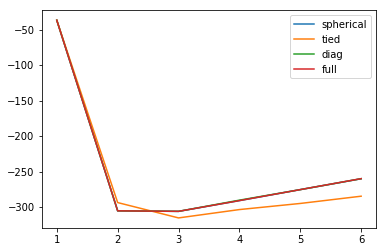

In [16]:
k_bic.plot()